IMPORTING DEPENDENCIES

In [49]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_auc_score
import joblib

IMPORTING THE PREPROCESSED DATASET

In [50]:
df = pd.read_csv(r'C:\Users\Shireen\Dropbox\PC\Documents\customer_churn_project\data\processed_data.csv')

In [51]:
X = df.drop('Churn', axis=1)
y = df['Churn']

CHECKING CLASS IMBALANCE

In [52]:
df["Churn"].value_counts()

Churn
0    5164
1    1857
Name: count, dtype: int64

In [53]:
df["Churn"].value_counts(normalize=True) * 100

Churn
0    73.550776
1    26.449224
Name: proportion, dtype: float64

ENCODING CATEGORICAL VARIABLES

In [54]:
X = pd.get_dummies(X, drop_first=True)

SPLITTING THE DATASET INTO TRAINING AND TESTING

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

FEATURE SCALING

In [56]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

HYPERPARAMETER TUNING / REGULARIZATION

In [57]:
param_grid = {
    "C": [0.01, 0.1, 1, 10]
}

log_reg = LogisticRegression(
    penalty="l2",
    solver="liblinear",
    max_iter=1000
)

grid_search = GridSearchCV(
    log_reg,
    param_grid,
    scoring="recall",
    cv=5
)

TRAIN THE MODEL

In [58]:
grid_search.fit(X_train_scaled, y_train)

c:\Users\Shireen\Dropbox\PC\Documents\customer_churn_project\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
c:\Users\Shireen\Dropbox\PC\Documents\customer_churn_project\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
c:\Users\Shireen\Dropbox\PC\Documents\customer_churn_project\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: 

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",LogisticRegre...r='liblinear')
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'C': [0.01, 0.1, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'recall'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also displayed;- >3 : the fold and candidate param

USE THE BEST MODEL

In [67]:
best_model = grid_search.best_estimator_

print("Best C value:", grid_search.best_params_)

Best C value: {'C': 0.01}


MODEL EVALUATION

In [68]:
y_pred = best_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.800711743772242

Confusion Matrix:
 [[928 105]
 [175 197]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1033
           1       0.65      0.53      0.58       372

    accuracy                           0.80      1405
   macro avg       0.75      0.71      0.73      1405
weighted avg       0.79      0.80      0.79      1405



FEATURE IMPORTANCE

In [82]:
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": best_model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

feature_importance.head(10)

,Feature,Coefficient
10,InternetService_Fiber optic,0.345561
28,PaymentMethod_Electronic check,0.154619
26,PaperlessBilling_Yes,0.143475
2,MonthlyCharges,0.142177
9,MultipleLines_Yes,0.114998
23,StreamingMovies_Yes,0.090860
0,SeniorCitizen,0.090310
21,StreamingTV_Yes,0.083355
8,MultipleLines_No phone service,0.062710
4,gender_Male,0.005922


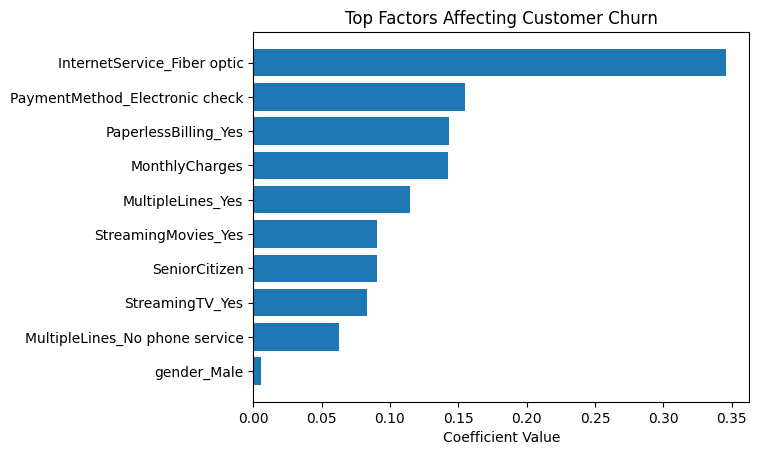

In [79]:
import matplotlib.pyplot as plt

top_features = feature_importance.head(10)

plt.figure()
plt.barh(top_features["Feature"], top_features["Coefficient"])
plt.xlabel("Coefficient Value")
plt.title("Top Factors Affecting Customer Churn")
plt.gca().invert_yaxis()
plt.show()

## INSIGHTS

### Business Insights from Customer Churn Model

Analysis of customer churn revealed that certain customer attributes significantly influence the likelihood of leaving the company. Customers using fiber optic internet, paying via electronic checks, opting for paperless billing, and having higher monthly charges are at the highest risk of churn. Additionally, customers with multiple phone lines or streaming services show a moderate increase in churn probability, and senior citizens demonstrate slightly higher risk, likely due to cost sensitivity.

Conversely, features not strongly associated with churn, such as gender, have minimal impact, indicating they are not significant retention drivers.

Actionable Recommendations:

Target high-risk customers (fiber optic, high bills, electronic check) with retention campaigns, discounts, or bundled long-term plans.

Promote loyalty features like long-term contracts and security services, which reduce churn.

Focus marketing and customer support efforts on segments showing higher churn probability to minimize revenue loss.

SAVING MODEL

In [83]:
import joblib

joblib.dump(best_model, "../models/logistic_regression.pkl")
joblib.dump(scaler, "../models/scaler.pkl")

['../models/scaler.pkl']

LOADING PIPELINE

In [87]:
loaded_pipeline = joblib.load(r"C:\Users\Shireen\Dropbox\PC\Documents\customer_churn_project\models\logistic_regression.pkl")

# Test with X_test
y_pred = loaded_pipeline.predict(X_test)

c:\Users\Shireen\Dropbox\PC\Documents\customer_churn_project\venv\Lib\site-packages\sklearn\utils\validation.py:2684: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
